In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

from fbprophet import Prophet

In [2]:
# function to run Prophet and return the forecast
def ProphetForecast(df_input):
    m = Prophet(daily_seasonality=False, yearly_seasonality=True, 
            seasonality_mode='multiplicative', growth='logistic')
    m.fit(df_input)
    # find how many periods we need by finding the last day in the item
    days_to_predict = pd.to_datetime('2016-1-31') - df_input['ds'].max()
    future = m.make_future_dataframe(periods=days_to_predict.days)
    future['floor'] = 0
    future['cap'] = df_input['y'].max()
    forecast = m.predict(future)
    return forecast

In [3]:
df_sales = pd.read_csv('sales_train_v2.csv')
df_sales['ds'] = pd.to_datetime(df_sales['date'],  dayfirst=True)

# Create dataframe of most sold items

In [4]:
# find the most sold items
df_sales_totalitem = df_sales.loc[(df_sales['item_cnt_day']>0)]
df_sales_totalitem = df_sales_totalitem.groupby(['item_id'])['item_cnt_day'].sum().reset_index(name='item_cnt_total')
df_sales_totalitem = df_sales_totalitem.sort_values(by='item_cnt_total',ascending=False)
# check the 1st row
df_sales_totalitem.iloc[0]['item_id']
# drop items that did not sell more than 10000 items to start
df_sales_totalitem = df_sales_totalitem.loc[df_sales_totalitem['item_cnt_total']>10000]

# Loop starts here

In [5]:
# create a yhat dataframe to put the forecasted data for each item
yhat = df_sales[['ds']]
for index, row in df_sales_totalitem.iterrows():
    # create df for prophet
    df_fbprophet = df_sales.loc[(df_sales['item_id']==row['item_id'])]
    # sum the total sold for each day for this item
    df_fbprophet = df_fbprophet.groupby(['ds'])['item_cnt_day'].sum().reset_index(name='y')
    df_fbprophet['floor']=0
    df_fbprophet['cap']=df_fbprophet['y'].max()
    forecast = ProphetForecast(df_fbprophet)
    # forecast for the whole month of November
    print('item_id: ' + str(row['item_id']) + ', total items:' + str(row['item_cnt_total']), end="")
    print(', Nov 2015 forecast: '
          + str(int(round(forecast.loc[(forecast['ds']>=pd.to_datetime('2015-11-1')) 
                             & (forecast['ds']<=pd.to_datetime('2015-11-30'))]['yhat'].sum()))))
    # make a new column in forecast with the name of our item
    forecast[str(int(row['item_id']))] = forecast['yhat']
    # merge that data into the correct date time in our dataframe
    yhat = pd.merge(yhat,forecast[['ds', str(int(row['item_id']))]], how='outer', on='ds')


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


item_id: 20949.0, total items:187660.0, Nov 2015 forecast: 4366
item_id: 2808.0, total items:17255.0, Nov 2015 forecast: 24
item_id: 3732.0, total items:16676.0, Nov 2015 forecast: 0
item_id: 17717.0, total items:15830.0, Nov 2015 forecast: 795
item_id: 5822.0, total items:14522.0, Nov 2015 forecast: 400
item_id: 3734.0, total items:11733.0, Nov 2015 forecast: 0
item_id: 6675.0, total items:10315.0, Nov 2015 forecast: 0
item_id: 3731.0, total items:10105.0, Nov 2015 forecast: 0
item_id: 1855.0, total items:10041.0, Nov 2015 forecast: 0


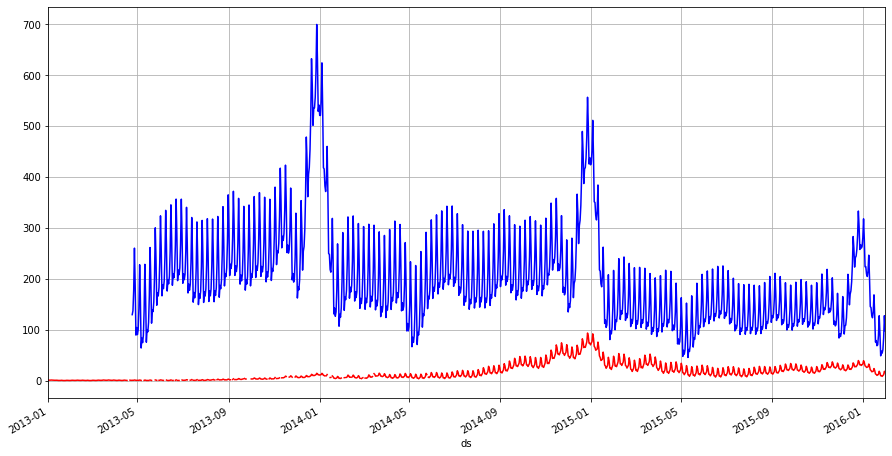

In [6]:
fig, ax = plt.subplots(figsize=(15,8))
ax = yhat.plot(ax=ax, x='ds', y='17717',  color='r',   legend=False, grid=True)
ax = yhat.plot(ax=ax, x='ds', y='20949',  color='b',   legend=False, grid=True)

In [7]:
# 30 days of November
yhat.loc[(yhat['ds']>=pd.to_datetime('2015-11-1'))
             & (yhat['ds']<=pd.to_datetime('2015-11-30'))]

,ds,20949,2808,3732,17717,5822,3734,6675,3731,1855
2935849,2015-11-01,158.460789,0.556721,9.492974e-09,24.646429,11.283712,6.350799e-09,2.679618e-12,0.000050,5.806518e-08
2935850,2015-11-02,111.576861,0.418862,9.314237e-09,17.957060,9.058684,6.158614e-09,2.734618e-12,0.000044,5.357897e-08
2935851,2015-11-03,124.906966,0.540750,9.225791e-09,18.476121,10.170344,6.093681e-09,2.715147e-12,0.000044,5.043134e-08
2935852,2015-11-04,122.777712,0.460809,9.057241e-09,17.532115,9.854518,5.910125e-09,2.710648e-12,0.000040,4.672294e-08
2935853,2015-11-05,132.671255,0.888992,8.765062e-09,20.013319,9.951999,5.728204e-09,2.731221e-12,0.000039,4.539967e-08
2935854,2015-11-06,159.829164,1.125701,8.640766e-09,22.720003,13.769467,5.695564e-09,2.735112e-12,0.000038,4.318771e-08
2935855,2015-11-07,209.395735,0.520977,8.640960e-09,31.408438,15.574301,5.667130e-09,2.752046e-12,0.000036,4.333085e-08
2935856,2015-11-08,176.334401,0.210660,8.485423e-09,28.666648,13.509925,5.605573e-09,2.698697e-12,0.000036,4.080759e-08
2935857,2015-11-09,129.838750,0.159522,8.379557e-09,22.317469,11.349995,5.497112e-09,2.746258e-12,0.000032,3.726873e-08
2935858,2015-11-10,142.443324,0.362697,8.366474e-09,22.977775,12.462058,5.510126e-09,2.719010e-12,0.000032,3.503655e-08
